<a href="https://colab.research.google.com/github/inafees14/ML_projects/blob/main/plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plant Species Classification Using Convolutional Neural Networks (CNN)**

### **Introduction**

In recent years, the application of machine learning and deep learning in agriculture and botany has gained significant attention. One such application is the classification of plant species, which can be used for automated plant identification, biodiversity monitoring, and agricultural management. This project focuses on developing an image classification system that can accurately identify and classify 10 different types of plants, including Aloe Vera, Banana, Mango, Pineapple, and others, using a Convolutional Neural Network (CNN) model.

The system leverages the power of deep learning to analyze and classify plant images based on their visual features. By training a CNN model on a dataset of plant images, the system can learn to distinguish between different plant species with high accuracy. To enhance the model's performance, data augmentation techniques are applied to artificially increase the size and diversity of the training dataset, ensuring better generalization to unseen data.

This project is particularly useful for:

- Farmers and Agriculturists: To identify plant species and monitor crop health.

- Botanists and Researchers: To study plant biodiversity and classify plant species.

- Educational Purposes: To teach students about plant species and machine learning applications in biology.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/My Drive/Plants.zip"


In [ ]:
import shutil
import zipfile

# Define source and destination paths
zip_path = "/content/drive/My Drive/Plants.zip"
extract_path = "/content/Plants"

# Copy ZIP file to Colab's local storage
shutil.copy(zip_path, "/content/Plants.zip")

# Extract ZIP file
with zipfile.ZipFile("/content/Plants.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete! Files are stored at:", extract_path)


Extraction Complete! Files are stored at: /content/Plants


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 categories
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
main_folder1=r"/content/Plants/Plants"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    main_folder1,  # Use augmented dataset
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    main_folder1,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save("plant_classifier.h5")
keras.saving.save_model(mode_plant_class)


Found 1941 images belonging to 10 classes.
Found 483 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 38s 514ms/step - accuracy: 0.2165 - loss: 2.2203 - val_accuracy: 0.4203 - val_loss: 1.6012
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 437ms/step - accuracy: 0.4830 - loss: 1.4846 - val_accuracy: 0.5756 - val_loss: 1.2144
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 451ms/step - accuracy: 0.5997 - loss: 1.1648 - val_accuracy: 0.6004 - val_loss: 1.1318
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 414ms/step - accuracy: 0.6672 - loss: 0.9659 - val_accuracy: 0.6046 - val_loss: 1.0496
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 433ms/step - accuracy: 0.7313 - loss: 0.7601 - val_accuracy: 0.6501 - val_loss: 1.0379
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - accuracy: 0.8032 - loss: 0.5960 - val_accuracy: 0.6398 - val_loss: 1.0990
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 425ms/step - accuracy: 0.8629 - loss: 0.4289 - val_accuracy: 0.6501 - val_loss: 1.1695
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 429ms/step - accuracy: 0.9003 - loss: 0.2985 - val_accu

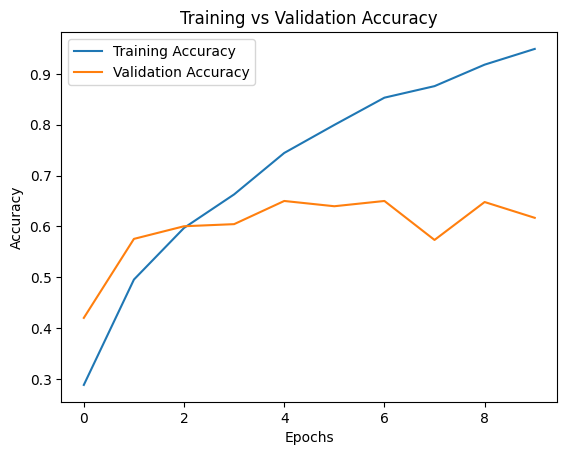

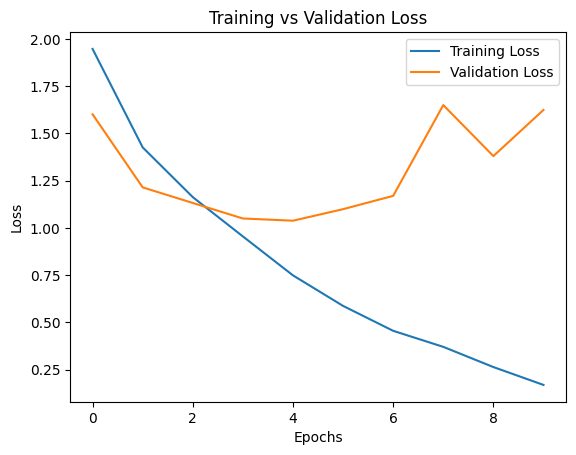

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("plant_classifier.h5")

# Path to a test image
test_image_path = "/content/Banana-Single (1).jpg"

# Load and preprocess the image
img = load_img(test_image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
Predicted Class: banana


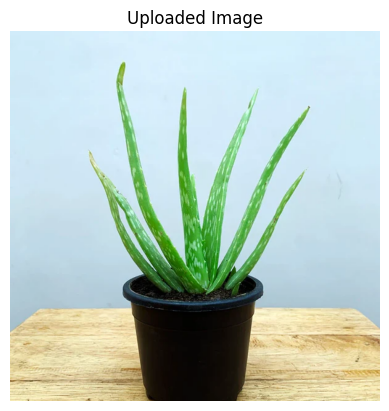

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Path to the image
image_path = "/content/Aloe-Vera-Website-Front.webp"

# Load the image
img = load_img(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()


In [ ]:
test_image_path = "/content/Aloe-Vera-Website-Front.webp"
# Load and preprocess the image
img = load_img(test_image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: aloevera


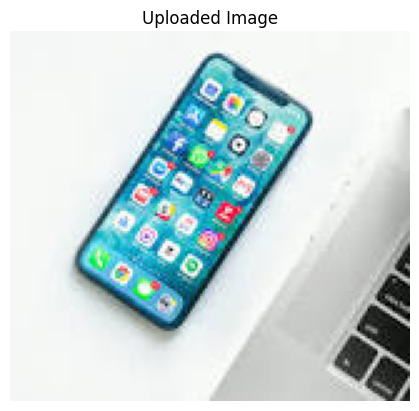

In [ ]:
# Path to the image
image_path = "/content/download.jpeg"

# Load the image
img = load_img(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()


In [ ]:
test_image_path2 = "/content/download.jpeg"
# Load and preprocess the image
img = load_img(test_image_path2, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: pineapple


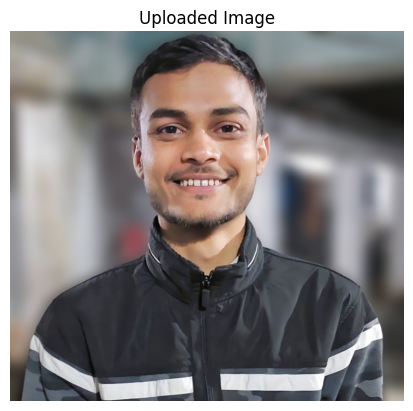

In [ ]:
# Path to the image
image_path = "/content/drive/My Drive/1000048895.jpg"

# Load the image
img = load_img(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()

In [ ]:
test_image_path2 = "/content/download.jpeg"
# Load and preprocess the image
img = load_img(test_image_path2, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: pineapple


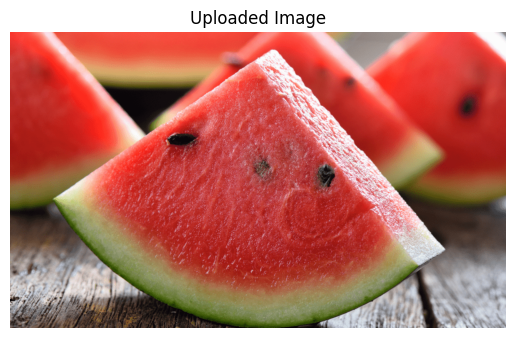

In [ ]:
# Path to the image
image_path3 = "/content/Untitled-design-29-1024x611.png"

# Load the image
img = load_img(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()

In [ ]:
# Load and preprocess the image
img = load_img(image_path3, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: watermelon


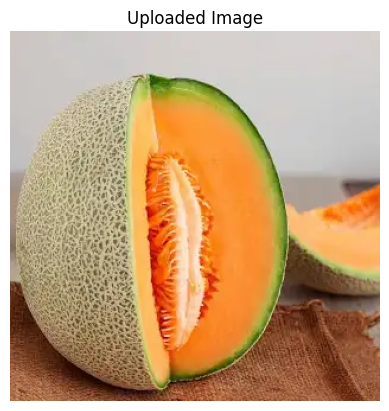

In [ ]:
img_path5 = "/content/download.webp"
# Load the image
img = load_img(img_path5)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()

In [ ]:
# Load and preprocess the image
img = load_img(img_path5, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: orange


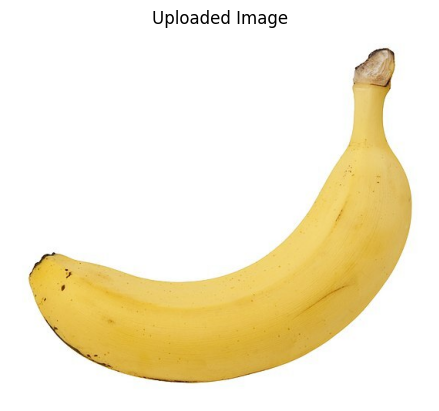

In [ ]:
img_path6 = "/content/Banana-Single (1).jpg"
# Load the image
img = load_img(img_path6)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Uploaded Image")
plt.show()

In [ ]:
img_path6 = "/content/Banana-Single (1).jpg"
# Load and preprocess the image
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: banana
